## CONTENT BASED

Content based merupakan salah satu teknik yang digunakan untuk memberikan rekomendasi dengan mempertimbangkan feature-feature lain yang memiliki kemiripan. <br>

Pada project ini, rekomendasi film yang diberikan dilihat berdasarkan besarnya korelasi antar film dengan mempertimbangkan feature-feature lain diantaranya :
1. Jenis film
2. Genre
3. Rating
4. Duration

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

**Import Dataset**

In [14]:
df=pd.read_csv('Movie1.csv',sep=';')
df.head(10)

,Movie,Jenis,Gendre,Rating,Kode_Rating,Duration
0,Avenger,Non Indo,Action,8.6,1.00,181
1,IT Chapter Two,Indo,Horror,7.0,0.36,169
2,Frozen 1,Non Indo,Animation,7.5,0.56,102
3,Gundala,Indo,Action,7.6,0.60,183
4,Dora and The Lost City of Gold,Non Indo,Adventure,6.1,1.00,102
5,The Conjuring,Non Indo,Horror,7.5,0.56,112
6,Bumi Manusia,Indo,Drama,7.2,0.44,181
7,Habibie & Ainun,Indo,Drama,7.6,0.60,120
8,Fast & Furious Presents : Hobbs & Shaw,Non Indo,Action,6.8,0.28,137
9,Incredibles 2,Non Indo,Animation,7.7,0.64,118


Pada variabel rating akan dilakukan normalize dengan menggunakan min max dan membentuk data baru dengan label kode rating.

**Mengubah judul film menjadi index**

In [3]:
df1=df.set_index('Movie',1)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Avenger to Incredibles 2
Data columns (total 5 columns):
Jenis          10 non-null object
Gendre         10 non-null object
Rating         10 non-null float64
Kode_Rating    10 non-null float64
Duration       10 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 480.0+ bytes


Jumlah data yang digunakan pada project ini adalah sebanyak 10 data dengan judul film : </br>
1. Avenger
2. IT Chapter Two
3. Frozen I
4. Gundala
5. Dora and The Lost City of Gold
6. Bumi Manusia
7. Habibie & Ainun
8. Fast & Furious Presents : Hubbs & Shaw
9. Incredibles 2

Untuk merekomendasikan film, akan mempertimbangkan genre, kode rating, dan Jenis film sehingga feature yang tidak digunakan akan dihapus

In [19]:
df2=df1.drop(['Duration','Rating'],1)

In [20]:
df2=pd.get_dummies(df2)

### Cosine Similarity 

Cosine similarity digunakan untuk mengetahui nilai kedekatan antar items

In [17]:
SM=cosine_similarity(df2,df2)

In [18]:
SM

array([[1.        , 0.14242717, 0.59213377, 0.60131682, 0.66666667,
        0.59213377, 0.17151943, 0.22549381, 0.91308173, 0.60997318],
       [0.14242717, 1.        , 0.09082332, 0.54241108, 0.14242717,
        0.54133582, 0.53595807, 0.54241108, 0.04791229, 0.10170937],
       [0.59213377, 0.09082332, 1.        , 0.14379346, 0.59213377,
        0.56777317, 0.10937494, 0.14379346, 0.52753293, 0.99885133],
       [0.60131682, 0.54241108, 0.14379346, 1.        , 0.22549381,
        0.14379346, 0.55553619, 0.57627119, 0.52737832, 0.1610285 ],
       [0.66666667, 0.14242717, 0.59213377, 0.22549381, 1.        ,
        0.59213377, 0.17151943, 0.22549381, 0.51260729, 0.60997318],
       [0.59213377, 0.54133582, 0.56777317, 0.14379346, 0.59213377,
        1.        , 0.10937494, 0.14379346, 0.52753293, 0.5753221 ],
       [0.17151943, 0.53595807, 0.10937494, 0.55553619, 0.17151943,
        0.10937494, 1.        , 0.99504266, 0.05769889, 0.12248459],
       [0.22549381, 0.54241108, 0.1437934

### Applying Content Based

Pada content based, rekomendasi yang diberikan bergantung pada besarnya korelasi antar feature. Semakin besar nilai korelasi maka semakin kuat hubungan antar items 

In [21]:
content_based=pd.DataFrame(SM,index=df1.index,columns=df1.index)
content_based

Movie,Avenger,IT Chapter Two,Frozen 1,Gundala,Dora and The Lost City of Gold,The Conjuring,Bumi Manusia,Habibie & Ainun,Fast & Furious Presents : Hobbs & Shaw,Incredibles 2
Movie,,,,,,,,,,
Avenger,1.000000,0.142427,0.592134,0.601317,0.666667,0.592134,0.171519,0.225494,0.913082,0.609973
IT Chapter Two,0.142427,1.000000,0.090823,0.542411,0.142427,0.541336,0.535958,0.542411,0.047912,0.101709
Frozen 1,0.592134,0.090823,1.000000,0.143793,0.592134,0.567773,0.109375,0.143793,0.527533,0.998851
Gundala,0.601317,0.542411,0.143793,1.000000,0.225494,0.143793,0.555536,0.576271,0.527378,0.161028
Dora and The Lost City of Gold,0.666667,0.142427,0.592134,0.225494,1.000000,0.592134,0.171519,0.225494,0.512607,0.609973
The Conjuring,0.592134,0.541336,0.567773,0.143793,0.592134,1.000000,0.109375,0.143793,0.527533,0.575322
Bumi Manusia,0.171519,0.535958,0.109375,0.555536,0.171519,0.109375,1.000000,0.995043,0.057699,0.122485
Habibie & Ainun,0.225494,0.542411,0.143793,0.576271,0.225494,0.143793,0.995043,1.000000,0.075856,0.161028
Fast & Furious Presents : Hobbs & Shaw,0.913082,0.047912,0.527533,0.527378,0.512607,0.527533,0.057699,0.075856,1.000000,0.526927


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

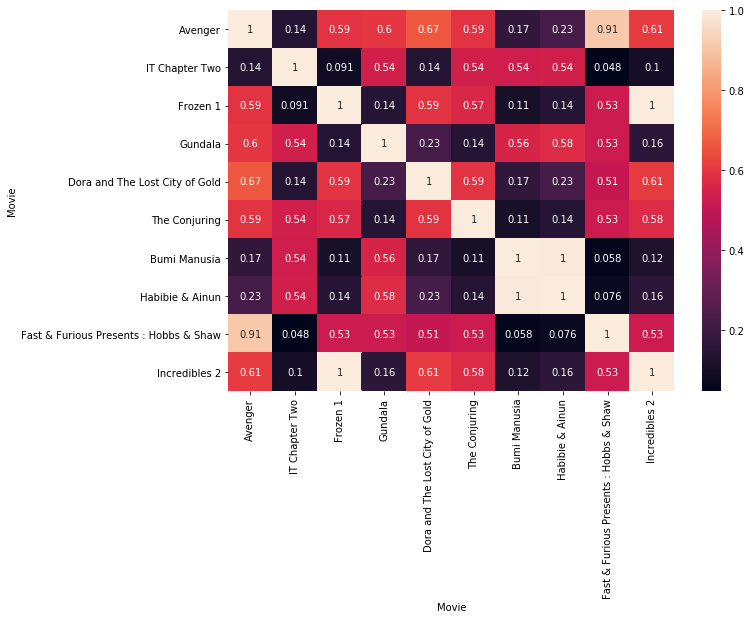

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(content_based,annot=True)

**Rekomendasi Film**

Rekomendasi film yang diberikan sebanyak 3 film sesuai dengan feature-feature yang memiliki kedekatan. Feature yang digunakan untuk memberikan rekomendasi genre, kode rating, dan jenis film.

In [12]:
Rekomendasi_movie=pd.DataFrame(content_based.iloc[:,1].sort_values(ascending=False))[1:].head(3)
Rekomendasi_movie

,IT Chapter Two
Movie,
Habibie & Ainun,0.542411
Gundala,0.542411
The Conjuring,0.541336


In [13]:
Rekomendasi_movie=pd.DataFrame(content_based.iloc[:,2].sort_values(ascending=False))[1:].head(3)
Rekomendasi_movie

,Frozen 1
Movie,
Incredibles 2,0.998851
Dora and The Lost City of Gold,0.592134
Avenger,0.592134


### Conclusion

* Content based didasarkan pada besarnya korelasi antar film dengan feature. Feature yang digunakan sebagai rekomendasi adalah genre, kode rating, dan jenis film.</br>
* Pada project ini, sebagai contoh film yang telah ditonton adalah IT Chapter Two maka film yang direkomendasikan adalah Habibie& Ainun, Gundala, dan The Conjuring